In [1]:
import keras 
import tensorflow as ts
import numpy as np

In [2]:
fashion_mnist = ts.keras.datasets.fashion_mnist


In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
test_labels.shape


(10000,)

#### Visualising images from train and test dataset

In [8]:
import matplotlib.pyplot as plt

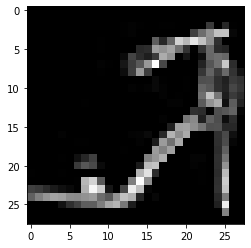

In [9]:
plt.imshow(train_images[8,:,:].reshape(28,28),cmap='gray')

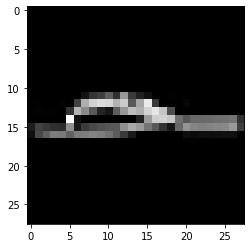

In [10]:
plt.imshow(test_images[8,:,:].reshape(28,28),cmap='gray')

#### Scaling the pixel data

In [11]:
train_images = train_images.reshape((train_images.shape[0], 28 * 28 * 1))
test_images = test_images.reshape((test_images.shape[0], 28 * 28 * 1))

# scale data to the range of [0, 1]
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [12]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.transform(test_labels)

#### Feed Forward architecture

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [14]:
model = Sequential()
model.add(Dense(64, input_shape=(784,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(10, activation="softmax"))

Softmax Activation Function is used here as we should not use activation functions like sigmoid or tanh in the multiclass classification problems. 

#### Training data and Training label

In [15]:
sgd = SGD()
model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
H = model.fit(train_images, train_labels,epochs=100, batch_size=1000,validation_split= 0.10)

Epoch 1/100
48/48 [==============================] - 1s 13ms/step - loss: 1.9460 - accuracy: 0.4110 - val_loss: 1.6405 - val_accuracy: 0.5732
Epoch 2/100
48/48 [==============================] - 0s 9ms/step - loss: 1.4443 - accuracy: 0.6260 - val_loss: 1.2497 - val_accuracy: 0.6711
Epoch 3/100
48/48 [==============================] - 0s 9ms/step - loss: 1.1452 - accuracy: 0.6850 - val_loss: 1.0335 - val_accuracy: 0.7108
Epoch 4/100
48/48 [==============================] - 1s 14ms/step - loss: 0.9805 - accuracy: 0.7170 - val_loss: 0.9117 - val_accuracy: 0.7343
Epoch 5/100
48/48 [==============================] - 1s 12ms/step - loss: 0.8829 - accuracy: 0.7356 - val_loss: 0.8362 - val_accuracy: 0.7512
Epoch 6/100
48/48 [==============================] - 0s 9ms/step - loss: 0.8188 - accuracy: 0.7494 - val_loss: 0.7836 - val_accuracy: 0.7623
Epoch 7/100
48/48 [==============================] - 1s 12ms/step - loss: 0.7724 - accuracy: 0.7604 - val_loss: 0.7449 - val_accuracy: 0.7649
Epoch 8/1

#### Loss function

The loss function used here is the 'categorical_crossentropy'.Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events.

Cross-entropy builds upon the idea of entropy from information theory and calculates the number of bits required to represent or transmit an average event from one distribution compared to another distribution.

The result will be a positive number measured in bits and will be equal to the entropy of the distribution if the two probability distributions are identical.


#### Summary of the model

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


#### Trainable parameters:


For the Wx + b operation in each neuron, W and b are trainable – because they are changed by optimizers after backpropagation was applied for gradient computation. In the model built there are (235,146) trainable parameters

#### Non-trainable paramters:

Non-trainable parameters are the ones that are not trained using gradient descent. Here if we include a BatchNormalization layer, the non trainable variables can be identified.

#### Predictions

In [17]:
from sklearn.metrics import classification_report,accuracy_score


In [18]:
predictions = model.predict(test_images, batch_size=1000)
predictions

array([[3.6092628e-05, 8.7269973e-06, 8.2079559e-06, ..., 1.8577361e-01,
        2.1229107e-03, 7.1119457e-01],
       [1.0034205e-04, 2.7709393e-06, 9.6019000e-01, ..., 3.1955755e-10,
        3.4899032e-05, 1.5644649e-09],
       [2.3614706e-05, 9.9994922e-01, 3.2879125e-06, ..., 1.5409392e-09,
        4.2585302e-07, 7.3689960e-10],
       ...,
       [5.5366743e-02, 2.5820107e-05, 1.5580966e-03, ..., 3.0297934e-04,
        8.7525004e-01, 1.1558981e-05],
       [1.9549798e-05, 9.9866664e-01, 3.1066153e-05, ..., 2.0486547e-07,
        1.4710587e-06, 1.6977895e-06],
       [5.7806465e-04, 3.2560946e-04, 3.7289108e-04, ..., 3.2295403e-01,
        1.7259667e-02, 3.6479358e-02]], dtype=float32)

In [19]:
np.argmax(predictions)

43241

In [20]:
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [44]:
import pandas as pd

loss=history.history['loss']
val_loss=history.history['val_loss']
loss=history.history['loss']
val_loss=history.history['val_loss']
dic={'Training loss':loss,'Validation loss':val_loss}

l=pd.DataFrame(dic)
l['epoch']=l.index
l=l[['epoch','Training loss','Validation loss']]
l

,epoch,Training loss,Validation loss
0,0,0.436892,0.419003
1,1,0.434362,0.417510
2,2,0.435427,0.416686
3,3,0.433197,0.417326
4,4,0.430513,0.415208
...,...,...,...
95,95,0.374152,0.370726
96,96,0.373701,0.370947
97,97,0.371547,0.369587
98,98,0.373014,0.369638


Text(0, 0.5, 'Loss')

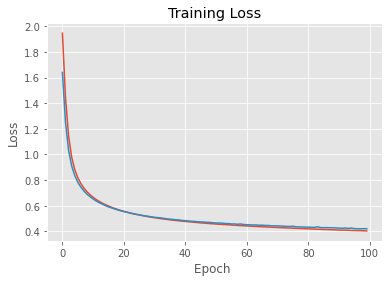

In [21]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")

plt.title("Training Loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

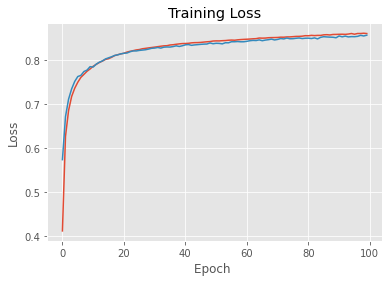

In [22]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_loss")

plt.title("Training Loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")

We can see that there is a possibility that the model is overfitted. From the above graph since both the values of accuracy are 
overlapping each other, we came to this conclusion.


#### Treating the problem of Overfitting

In [23]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from keras.layers.core import Dense,Flatten 

In [24]:
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu"))
model.add(Dense(128, activation="relu"))

#flattening the input
model.add(Flatten())

#adding dropout layer 
model.add(Dropout(0.2, seed= 100))

model.add(Dense(10, activation="softmax"))

In [26]:
#optimizing the model

sgd = SGD(learning_rate=0.01)

model.compile(loss='categorical_crossentropy',
             metrics=['accuracy'],
             optimizer=sgd)

In [39]:
History = model.fit(train_images, train_labels,epochs=100, batch_size=1000,validation_split= 0.10)

Epoch 1/100
54/54 [==============================] - 1s 9ms/step - loss: 0.3658 - accuracy: 0.8711 - val_loss: 0.3657 - val_accuracy: 0.8685
Epoch 2/100
54/54 [==============================] - 1s 10ms/step - loss: 0.3680 - accuracy: 0.8705 - val_loss: 0.3652 - val_accuracy: 0.8690
Epoch 3/100
54/54 [==============================] - 1s 10ms/step - loss: 0.3665 - accuracy: 0.8712 - val_loss: 0.3650 - val_accuracy: 0.8688
Epoch 4/100
54/54 [==============================] - 1s 16ms/step - loss: 0.3657 - accuracy: 0.8708 - val_loss: 0.3645 - val_accuracy: 0.8688
Epoch 5/100
54/54 [==============================] - 0s 9ms/step - loss: 0.3650 - accuracy: 0.8716 - val_loss: 0.3646 - val_accuracy: 0.8687
Epoch 6/100
54/54 [==============================] - 1s 16ms/step - loss: 0.3643 - accuracy: 0.8718 - val_loss: 0.3649 - val_accuracy: 0.8685
Epoch 7/100
54/54 [==============================] - 1s 14ms/step - loss: 0.3647 - accuracy: 0.8728 - val_loss: 0.3638 - val_accuracy: 0.8695
Epoch 8/

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
flatten (Flatten)            (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [30]:
predictions = model.predict(test_images, batch_size=1000)
predictions

array([[7.5363474e-05, 1.1938235e-04, 1.6782295e-04, ..., 1.6392329e-01,
        2.0718526e-03, 7.2445881e-01],
       [1.2911345e-04, 2.8977920e-06, 9.7554249e-01, ..., 4.9495821e-09,
        1.9429574e-05, 1.0530798e-08],
       [4.5866891e-05, 9.9992085e-01, 5.6329363e-06, ..., 3.7348791e-08,
        1.3607156e-08, 6.5065365e-08],
       ...,
       [9.6883820e-03, 8.7261351e-06, 4.4158418e-04, ..., 7.8836361e-05,
        9.6779519e-01, 2.2238173e-05],
       [7.2025978e-05, 9.9912864e-01, 5.4879300e-05, ..., 1.9097811e-06,
        6.8936475e-07, 2.0749556e-05],
       [5.6699297e-04, 7.2269276e-04, 1.8963716e-03, ..., 1.3174894e-01,
        1.0408274e-02, 9.2016868e-03]], dtype=float32)

Text(0, 0.5, 'Loss')

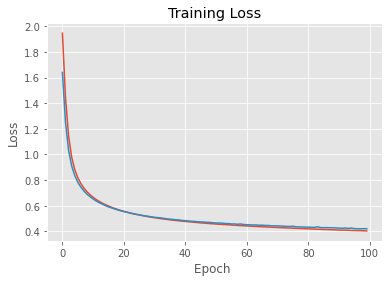

In [41]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")

plt.title("Training Loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

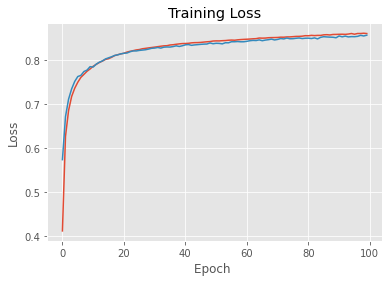

In [32]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_loss")

plt.title("Training Loss")
plt.xlabel("Epoch ")
plt.ylabel("Loss")